# Testing the effect of satellites on profile measurement and mass determination

In [1]:
import sys
sys.path.append('/Users/fardila/Documents/GitHub/HSC_vs_hydro/')
from functions import *

import numpy as np
import h5py
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
import glob
import random

from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.stats import sigmaclip

from astropy.table import Table

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]
%matplotlib inline 
%load_ext autoreload 
%autoreload 2

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


      +------------------------------------------------------------+
      |             Space Telescope Tables Package                 |
      |                  TABLES Version 3.18.3                     |
      |                                                            |
      |   Space Telescope Science Institute, Baltimore, Maryland   |
      |   Copyright (C) 2014 Association of Universities for       |
      |            Research in Astronomy, Inc.(AURA)               |
      |       See stsdas$copyright.stsdas for terms of use.        |
      |         For help, send e-mail to help@stsci.edu            |
      +------------------------------------------------------------+
tables/:
 fitsio/        tbplot/         tobsolete/      ttools/


      +------------------------------------------------------------+
      |       Space Telescope Science Data Analysis System         |


In [2]:
#load files
cen_profile_file = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_highres.pkl'
censat_profile_file = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_cen+sats_highres.pkl'

highres_cen_isos = load_pkl(cen_profile_file)
highres_censat_isos = load_pkl(censat_profile_file)

pixel_scale_highres = 1.0

In [3]:
#load files
cen_profile_file = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_quick.pkl'
censat_profile_file = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_cen+sats_quick.pkl'

quick_cen_isos = load_pkl(cen_profile_file)
quick_censat_isos = load_pkl(censat_profile_file)

pixel_scale_quick = 5.333

# Plot profiles and differences for TNG galaxies

In [4]:
def mu_given_radial_bins(iso, pixel_scale, rmin=0.05, rmax=150, nbin=150):
    
    r_bins = np.linspace(rmin**0.25, rmax**0.25, nbin)**4
    intens = np.interp(r_bins, iso['sma'], iso['intens'])
    return 10**(np.log10(intens / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0))

def fractional_difference(profile_with_sats, profile_without_sats, pixel_scale, rmin=0.05, rmax=150, nbin=150):
    return (mu_given_radial_bins(profile_with_sats, pixel_scale, rmin, rmax, nbin)- \
            mu_given_radial_bins(profile_without_sats, pixel_scale, rmin, rmax, nbin))/\
            mu_given_radial_bins(profile_without_sats, pixel_scale, rmin, rmax, nbin)


#  highres

## just removing the 2 weird galaxies

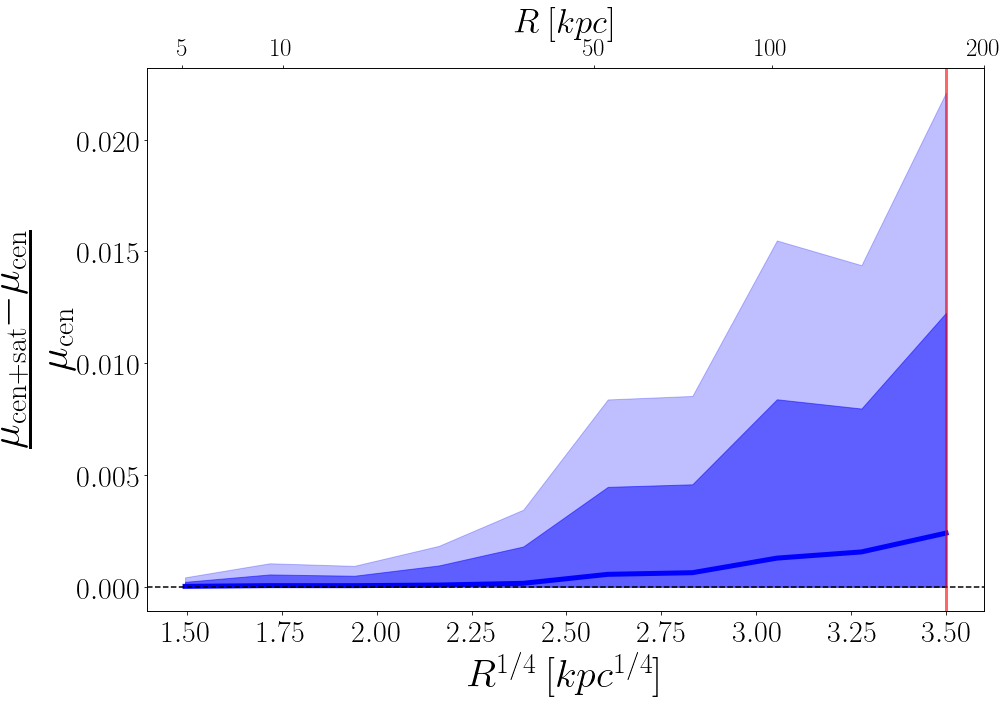

In [9]:
#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

pixel_scale = pixel_scale_highres

rmin=5
rmax=150
nbin=10

r_bins = np.linspace(rmin**0.25, rmax**0.25, nbin)**4

n = len(highres_censat_isos)
color=iter(plt.cm.rainbow(np.linspace(0,1,n)))


difference = [fractional_difference(highres_censat_isos[i], highres_cen_isos[i], pixel_scale, rmin, rmax, nbin) for i in range(len(highres_censat_isos))[2:]]

median_difference = np.nanmedian(difference, axis=0)
mean_difference = np.nanmean(difference, axis=0)
std_difference = np.nanstd(difference, axis=0)
######################################################################################################################
# plot
######################################################################################################################



# ax1.plot(r_bins ** 0.25,median_difference, linewidth=5, alpha=0.5, zorder=1, color='k')
# ax1.fill_between(r_bins ** 0.25, median_difference+std_difference, median_difference-std_difference,
#                  alpha=0.25, zorder=1, color='k')

ax1.plot(r_bins ** 0.25, mean_difference, linewidth=5, alpha=1, zorder=1, color='b')
ax1.fill_between(r_bins ** 0.25, mean_difference+std_difference, 0,
                 alpha=0.5, zorder=1, color='b')
ax1.fill_between(r_bins ** 0.25, mean_difference+2*std_difference, 0,
                 alpha=0.25, zorder=1, color='b')

# ax1.fill_between(r_bins ** 0.25, mean_difference+std_difference, mean_difference-std_difference,
#                  alpha=0.5, zorder=1, color='b')
# ax1.fill_between(r_bins ** 0.25, mean_difference+2*std_difference, mean_difference-2*std_difference,
#                  alpha=0.25, zorder=1, color='b')

ax1.axhline(0, linestyle='--',color='k')
# ######################################################################################################################
# # plot details
# ######################################################################################################################
# # X-Y limits
# ax1.set_xlim(1**0.25, 4.5)
# ax1.set_ylim(-4, 10)

# Labels
# ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
#                size=60)
# ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

handles, labels = ax1.get_legend_handles_labels()
# ax1.legend(handles[:2], labels[:2], fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25])
ax1_twin.xaxis.set_ticklabels(["$5$", "$10$", "$50$", "$100$", "$200$"])
ax1_twin.tick_params(axis='both', which='major', labelsize=25)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=35)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=40)
ax1.set_ylabel(r'$\frac{\mu_{\mathrm{cen+sat}}-\mu_{\mathrm{cen}}}{\mu_{\mathrm{cen}}}$', fontsize=60, labelpad=-10)
#ax1.set_title('5 randomly selected profiles and extrapolations', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(150.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')


######################################################################################################################
fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/fractional_difference_satellites_highres_remove_negatives.pdf',
            dpi=100, format='pdf', bbox_inches='tight')

plt.show()